# Natural Language Processing

Objective: Practice separating'Regular' news from 'Fake' or 'Satirical' news

Data is downloaded from Kaggle https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful for collecting supplementary data

In [1]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

## Download news headlines dataset

In [2]:
df  = pd.read_json('data/Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


##  Check for Class balance between Regular and Sarcastic news

In [4]:
df.is_sarcastic.value_counts(normalize=True)

0    0.523603
1    0.476397
Name: is_sarcastic, dtype: float64

<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

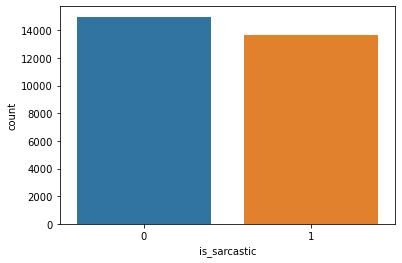

In [6]:
sns.countplot(df.is_sarcastic)

## Any patterns from Wordcloud?

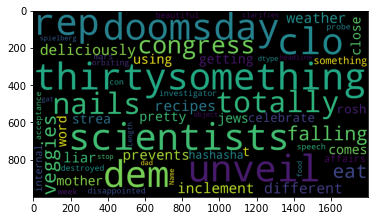

In [8]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = Wora`dCloud(background_color='black',
                    stopwords = STOPWORDS,
                    max_words = 100,
                    random_state = 101, 
                    width=1800, 
                    height=1000)
wordcloud.generate(str(df['headline']))
plt.imshow(wordcloud)

In [9]:
df['headline_len'] = df.headline.apply(lambda x: len(x.split()))

In [10]:
df

,is_sarcastic,headline,article_link,headline_len
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,8
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,13
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,7
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,8
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,9
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,7
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,13
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...,12
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,8


In [13]:
sarcastic = df[df.is_sarcastic == 1]
regular = df[df.is_sarcastic == 0]

In [17]:
sarcastic

,is_sarcastic,headline,article_link,headline_len
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,8
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,8
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,9
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...,13
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...,12
...,...,...,...,...
28612,1,polish rapper under fire for use of the word '...,https://entertainment.theonion.com/polish-rapp...,10
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,7
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,13
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,8


In [18]:
regular

,is_sarcastic,headline,article_link,headline_len
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,13
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,7
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...,3
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...,9
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...,6
...,...,...,...,...
28607,0,what our grieving family needs from loved ones...,https://www.huffingtonpost.com/entry/what-our-...,11
28608,0,stephen colbert attempts to list everything tr...,https://www.huffingtonpost.com/entry/stephen-c...,12
28609,0,bakery owner vows to stop making wedding cakes...,https://www.huffingtonpost.com/entry/jack-phil...,13
28613,0,how san antonio's dominant defense is fueling ...,https://www.huffingtonpost.com/entry/san-anton...,9


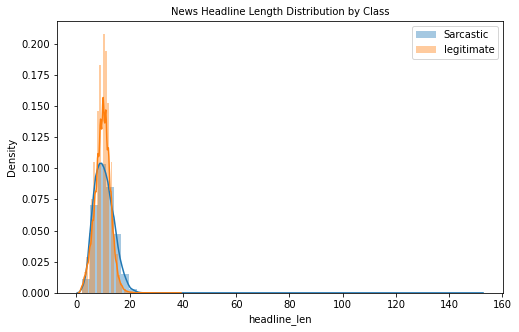

In [21]:
plt.figure(figsize=(8,5))
sns.distplot(sarcastic.headline_len, hist= True, label= 'Sarcastic')
sns.distplot(regular.headline_len, hist= True, label= 'legitimate')
plt.legend()
plt.title('News Headline Length Distribution by Class', fontsize = 10)
plt.show()